# Traditional Machine Learning Evaluation

#### Load Packages

In [1]:
import sklearn
import numpy as np
import pandas as pd
import scipy
import matplotlib
from platform import python_version

print("Python version:     ", python_version())
print("sklearn version:    ", sklearn.__version__)
print("numpy version:      ", np.__version__)
print("pandas version:     ", pd.__version__)
print("scipy version:      ", scipy.__version__)
print("matplotlib version: ", matplotlib.__version__)

Python version:      3.9.7
sklearn version:     1.1.2
numpy version:       1.20.3
pandas version:      1.3.4
scipy version:       1.7.1
matplotlib version:  3.4.3


## 3.2 Commonly Used Evaluation Metrics

### 3.2.1 Classification

Working with the [Breast Cancer Dataset](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic))

In [2]:
import pandas as pd
link = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
data = pd.read_csv(link, header=None, na_values="?")
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


The first column is the id number, the next 9 are features, and the last is the class (malignant or benign).

Column 6 has 6 missing values.  Replacing with the mean of the column.

In [3]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

imp_avg = SimpleImputer(missing_values=float("nan"), strategy = "mean")

imp = ColumnTransformer(transformers=[("avg", imp_avg, [6])])

imp.fit(data)
tmp = imp.transform(data)
data[6] = tmp
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


Transforming the response column to one-hot encoding:

In [4]:
data[10] = data[10] == 2

In [5]:
y = data[10] == True

In [6]:
X = data.drop([0,10],axis=1)

In [7]:
X= X.to_numpy()

## Train/Test

In [8]:
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(42)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=143)

## Implement SVM

In [9]:
from sklearn.svm import SVC

SVM = SVC(probability=True)
SVM.fit(X_train1, y_train1)

SVC(probability=True)

## Confusion Matrix

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix
import matplotlib.pyplot as plt

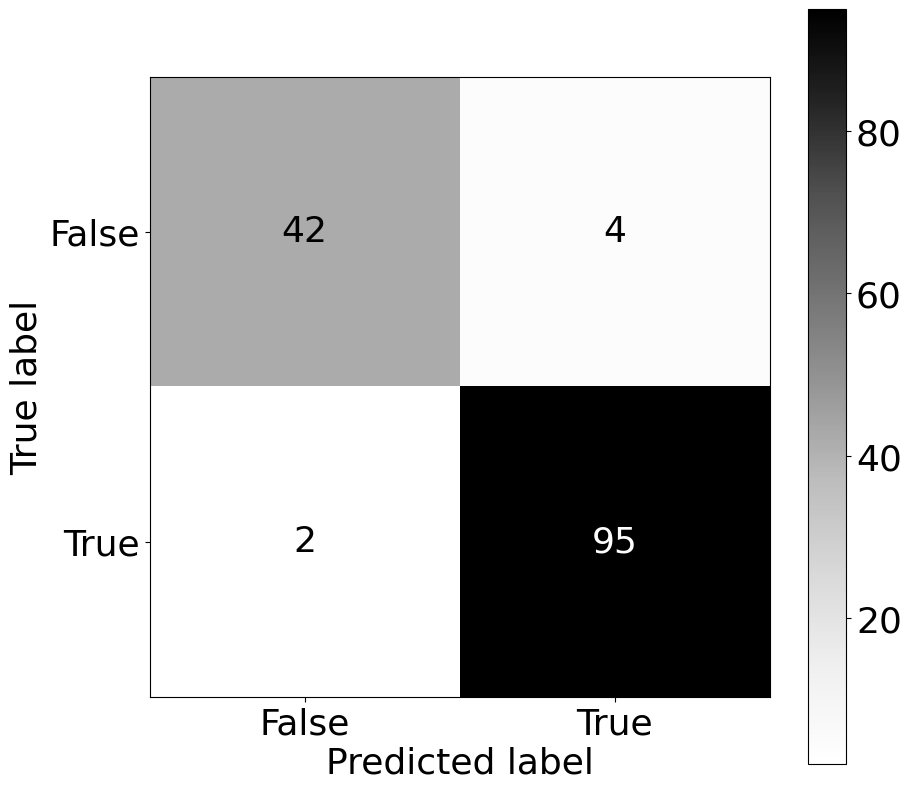

In [11]:
font = {'size'   : 26}
plt.rc('font', **font)
plt.figure(figsize=(10,10),dpi=100)
disp = ConfusionMatrixDisplay.from_estimator(SVM, X_test1, y_test1, cmap="Greys", ax=plt.gca())
plt.savefig("./Figures/Figure3-1.pdf",format="pdf",bbox_inches="tight")
plt.show()


## ROC Curve Example

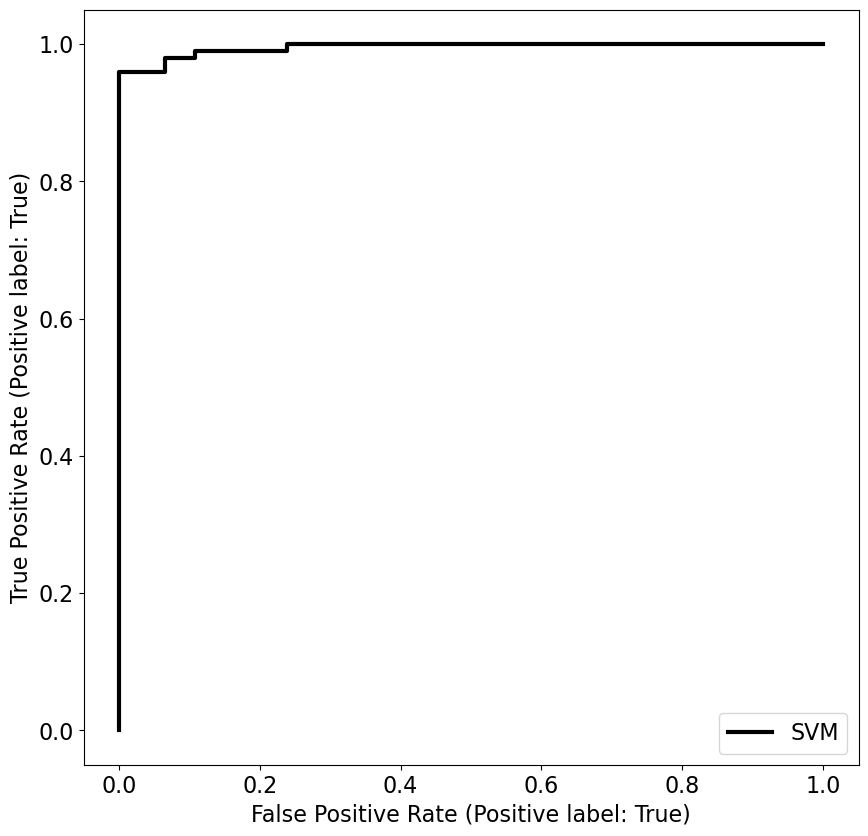

In [21]:
from sklearn.metrics import roc_curve, RocCurveDisplay

font = {'size'   : 16}
plt.rc('font', **font)
plt.figure(figsize=(10,10), dpi =100)
RocCurveDisplay.from_estimator(SVM, X_test1, y_test1, ax=plt.gca(), color = "k", lw=3, label="SVC")
plt.show()

In [23]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()

DT.fit(X_train1, y_train1)

DecisionTreeClassifier()

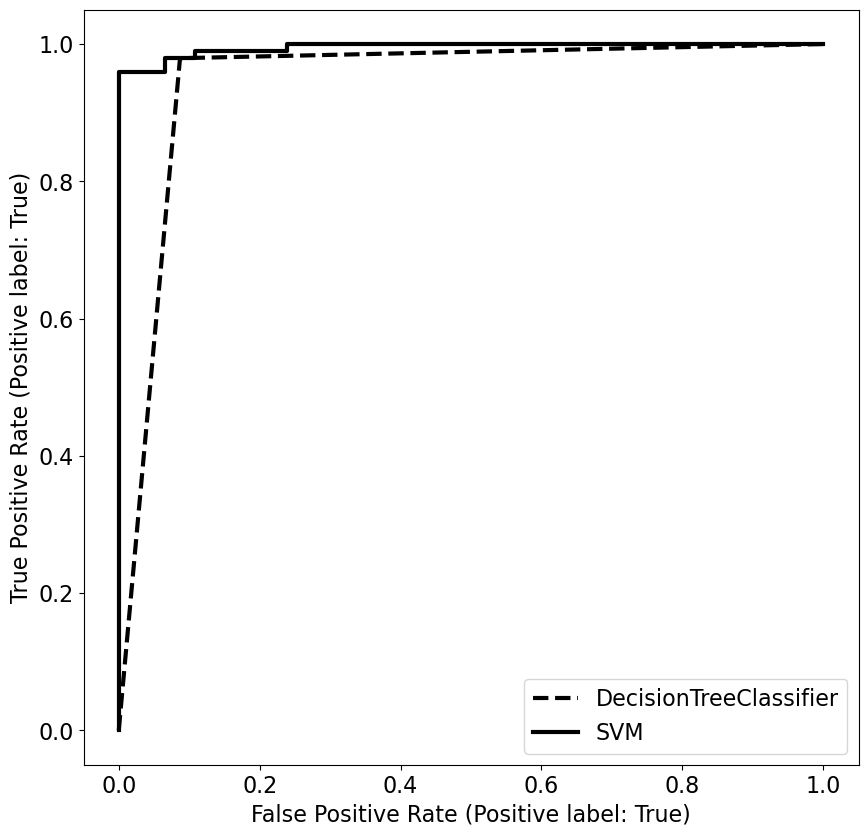

In [24]:
plt.figure(figsize=(10,10), dpi=100)

font = {'size'   : 16}
plt.rc('font', **font)
RocCurveDisplay.from_estimator(DT, X_test1, y_test1, ax = plt.gca(), ls="--", lw =3, color="k",
                              label="DecisionTreeClassifier")
RocCurveDisplay.from_estimator(SVM, X_test1, y_test1, ax = plt.gca(), color="k", lw=3,
                              label="SVM")
plt.legend(loc= "lower right")
plt.savefig("./Figures/Figure3-2.pdf",format="pdf")

plt.show()

# 3.2 Common Statistical Measures

### Table 3.4

In [18]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

X = mnist["data"]
y = mnist["target"]


In [19]:
# Filter out digits greater than 4
yi = []

for i in range(len(y)):
    yi.append(int(y[i]))
    
idx = np.array(yi) < 5

X_sub = X[idx,:]
y_sub = y[idx]

In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_sub,y_sub)



In [21]:
n = 500

param_poly = {"estimator__C": [0.1, 1, 10, 100, 1000], 
              "estimator__kernel": ["poly"],
               "estimator__degree": [1,2,3]} 

parameters = [param_poly]

one_v_all_1 = OneVsRestClassifier(SVC())
clf_grid = GridSearchCV(one_v_all_1, parameters)

# Training on Only the first 500 instances to save time. Just doing parameter searching so it's not a huge deal.
clf_grid.fit(X_train2[0:n,:], y_train2[0:n]) # using default k=5 for k-fold cross-validation

GridSearchCV(estimator=OneVsRestClassifier(estimator=SVC()),
             param_grid=[{'estimator__C': [0.1, 1, 10, 100, 1000],
                          'estimator__degree': [1, 2, 3],
                          'estimator__kernel': ['poly']}])

In [22]:
best_svc = clf_grid.best_estimator_

best_svc.fit(X_train2, y_train2)

OneVsRestClassifier(estimator=SVC(C=1, degree=2, kernel='poly'))

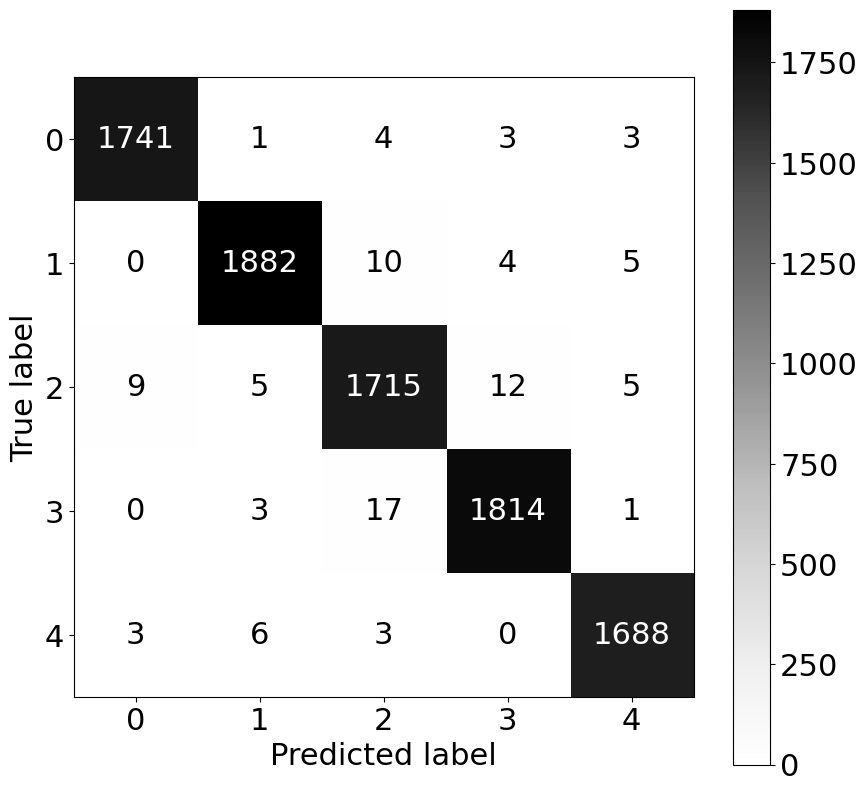

In [23]:
font = {'size'   : 22}
plt.rc('font', **font)
plt.figure(figsize=(10,10), dpi =100)
disp = ConfusionMatrixDisplay.from_estimator(best_svc, X_test2, y_test2, cmap="Greys", ax = plt.gca())
plt.savefig("./Figures/Table3-4.pdf",format="pdf",bbox_inches="tight")
plt.show()

#### Accuracy

In [25]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score
# Average along rows (True Values)
np.unique(y_test2, return_counts=True)[1]

array([1752, 1901, 1746, 1835, 1700])

In [26]:
matrix = confusion_matrix(y_test2, best_svc.predict(X_test2))

In [27]:
np.diag(matrix)

array([1741, 1882, 1715, 1814, 1688])

In [31]:
sum(np.diag(matrix)) / sum(np.unique(y_test2, return_counts=True)[1])

0.9894783971345422

In [28]:
accuracy_score(y_test2, best_svc.predict(X_test2))

0.9894783971345422

#### Balanced Accuracy

In [32]:
sum((np.diag(matrix) / np.unique(y_test2, return_counts=True)[1])/5)

0.9894937776174733

In [29]:
balanced_accuracy_score(y_test2, best_svc.predict(X_test2))

0.9894937776174733

# Common Statistical Tests
## 3.4.1 Two matched samples t-test

The code for this example can be found in the [jupyter notebook for Chapter 1: Statistics Overview](https://github.com/Lspoletini/EvaluatingMLAlgs/blob/main/Part_I/Chapter-1-Statistics-Overview/Statistics-Overview.ipynb) under ""(Chapter 3) Test Example Using Above Results"